<a href="https://colab.research.google.com/github/ybdtola/Adetola/blob/main/Natural%20Language%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
response = urllib.request.urlopen('http://en.wikipedia.org/wiki/SpaceX')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-w

In [16]:
soup = BeautifulSoup(html, 'html5lib')
text = soup.get_text(strip = True)
print(text)

SpaceX - Wikipediadocument.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+'-enabled',featureName+'-disabled');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequest

In [17]:
tokens = [t for t in text.split()]
print(tokens)

['SpaceX', '-', 'Wikipediadocument.documentElement.className="client-js', 'vector-feature-language-in-header-enabled', 'vector-feature-language-in-main-page-header-disabled', 'vector-feature-language-alert-in-sidebar-enabled', 'vector-feature-sticky-header-disabled', 'vector-feature-page-tools-disabled', 'vector-feature-page-tools-pinned-disabled', 'vector-feature-toc-pinned-enabled', 'vector-feature-main-menu-pinned-disabled', 'vector-feature-limited-width-enabled', 'vector-feature-limited-width-content-enabled";(function(){var', 'cookie=document.cookie.match(/(?:^|;', ')enwikimwclientprefs=([^;]+)/);if(cookie){var', 'featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","Sep

Streaming output truncated to the last 5000 lines.
20:19
years:2
ago(2002-03-14)inEl:1
Segundo,:2
California,:2
U.S.[3]FounderElon:1
MuskHeadquartersHawthorne,:1
California,United:1
StatesKey:1
people.mw-parser-output:1
.plainlist:4
ol,.mw-parser-output:8
ul{line-height:inherit;list-style:none;margin:0;padding:0}.mw-parser-output:1
ol:4
li,.mw-parser-output:1
ul:4
li{margin-bottom:0}Elon:1
Musk:49
(CEO,ChairmanandCTO,:1
2002–present)[4]Gwynne:1
Shotwell(president:1
andCOO)[5]Products.mw-parser-output:1
.hlist:49
dl,.mw-parser-output:7
ul{margin:0;padding:0}.mw-parser-output:1
dd,.mw-parser-output:1
dt,.mw-parser-output:1
li{margin:0;display:inline}.mw-parser-output:1
.hlist.inline,.mw-parser-output:1
.hlist.inline:3
ul,.mw-parser-output:4
dl:3
ul{display:inline}.mw-parser-output:1
.mw-empty-li{display:none}.mw-parser-output:1
dt::after{content:"::1
"}.mw-parser-output:3
dd::after,.mw-parser-output:1
li::after{content:":1
·:1
";font-weight:bold}.mw-parser-output:1
dd:last-child::after,.

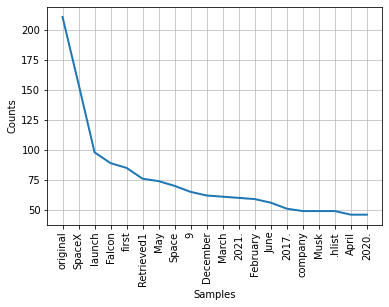

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('english'):
    clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

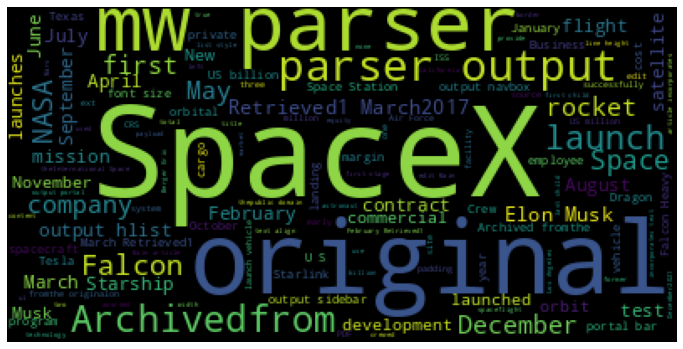

In [22]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(text)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus.reader import documents

from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [37]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
      features['contains({})'.format(word)] = (word in document_words)
      return features

In [38]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [40]:
print(nltk.classify.accuracy(classifier, test_set))

0.46


In [43]:
classifier.show_most_informative_features(5)

Most Informative Features
             contains(,) = False             neg : pos    =      1.7 : 1.0
             contains(,) = True              pos : neg    =      1.0 : 1.0
